In [104]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [105]:
df1 = pd.read_csv(r"/Users/ewoyi/data_analytics_class/Operational_research/all_breaches_df.csv")
df2 = pd.read_csv(r"/Users/ewoyi/data_analytics_class/Operational_research/pilot_tag_df.csv")

In [106]:
df1.head()

,offender_id,offender_name,breach_date
0,KQT6976RLP,Sian Connor,2023-04-15
1,SYZ9698SND,Mr Thomas Taylor,2023-03-10
2,COG0444UMC,Dr Debra Jackson,2023-01-28
3,IOU8015ZFN,Kenneth Baker-Jones,2023-01-10
4,BVU5951UNP,Mrs Grace Williams,2023-04-08


In [107]:
# Checking for missing values in all_breaches
for col in df1.columns:
    pct_missing = np.mean(df1[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

offender_id - 0.0%
offender_name - 0.0%
breach_date - 0.0%


In [108]:
df1.dtypes

offender_id      object
offender_name    object
breach_date      object
dtype: object

In [109]:
df2.head()

,offender_id,tag_install_date,tag_type,dob,sex,ethnic_group,original_offence
0,YEG6518QIV,2022-11-19,alcohol,1994-06-19,male,asian,Summary non-motoring
1,JME7219QND,2022-09-02,location,1986-09-19,female,white,Violence against the person
2,WSO1347WIQ,2022-10-10,curfew,1988-10-05,male,other,Drug offence
3,TUP1206QEM,2022-12-14,location,1953-12-28,male,other,Theft offence
4,AVL7422VBW,2022-08-11,alcohol,1982-04-20,female,mixed,Theft offence


In [110]:
# Checking for missing values in pilot_tages
for col in df2.columns:
    tag_missing = np.mean(df2[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

offender_id - 0.0%
tag_install_date - 0.0%
tag_type - 0.0%
dob - 0.0%
sex - 0.0%
ethnic_group - 0.0%
original_offence - 0.0%


In [111]:
df2.dtypes

offender_id         object
tag_install_date    object
tag_type            object
dob                 object
sex                 object
ethnic_group        object
original_offence    object
dtype: object

In [112]:
# Merged Files
df3 = pd.merge(df1, df2, on='offender_id', how='right')

In [113]:
df3.head()

,offender_id,offender_name,breach_date,tag_install_date,tag_type,dob,sex,ethnic_group,original_offence
0,YEG6518QIV,Ricky Booth,2023-03-11,2022-11-19,alcohol,1994-06-19,male,asian,Summary non-motoring
1,JME7219QND,Dr Charlene Jordan,2023-03-05,2022-09-02,location,1986-09-19,female,white,Violence against the person
2,WSO1347WIQ,Joseph Green,2023-03-23,2022-10-10,curfew,1988-10-05,male,other,Drug offence
3,TUP1206QEM,Mr Danny Robinson,2023-02-13,2022-12-14,location,1953-12-28,male,other,Theft offence
4,AVL7422VBW,Miss Mary Taylor,2023-02-01,2022-08-11,alcohol,1982-04-20,female,mixed,Theft offence


In [114]:
# Checking for missing values in merged data
for col in df3.columns:
    tag_missing = np.mean(df3[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

offender_id - 0.0%
offender_name - 0.0%
breach_date - 0.0%
tag_install_date - 0.0%
tag_type - 0.0%
dob - 0.0%
sex - 0.0%
ethnic_group - 0.0%
original_offence - 0.0%


In [115]:
df4 = df3.dropna()

In [116]:
df4

,offender_id,offender_name,breach_date,tag_install_date,tag_type,dob,sex,ethnic_group,original_offence
0,YEG6518QIV,Ricky Booth,2023-03-11,2022-11-19,alcohol,1994-06-19,male,asian,Summary non-motoring
1,JME7219QND,Dr Charlene Jordan,2023-03-05,2022-09-02,location,1986-09-19,female,white,Violence against the person
2,WSO1347WIQ,Joseph Green,2023-03-23,2022-10-10,curfew,1988-10-05,male,other,Drug offence
3,TUP1206QEM,Mr Danny Robinson,2023-02-13,2022-12-14,location,1953-12-28,male,other,Theft offence
4,AVL7422VBW,Miss Mary Taylor,2023-02-01,2022-08-11,alcohol,1982-04-20,female,mixed,Theft offence
...,...,...,...,...,...,...,...,...,...
171,WVR0246ZRX,Geraldine Saunders,2023-02-17,2022-09-29,location,1979-04-03,female,white,Violence against the person
172,VFZ3076LYI,Amanda Carroll,2023-04-06,2022-08-16,alcohol,1953-02-18,female,white,Violence against the person
173,ATD5548TQU,Mr Nicholas Thomas,2023-02-13,2022-10-16,curfew,1988-09-07,male,unknown,Criminal Damage
174,JAZ3465UYP,Mr Bernard Lee,2023-03-09,2022-12-03,alcohol,2017-01-25,male,unknown,Criminal Damage


In [117]:
# Summary of the table
df4.describe(include='all')


,offender_id,offender_name,breach_date,tag_install_date,tag_type,dob,sex,ethnic_group,original_offence
count,176,176,176,176,176,176,176,176,176
unique,176,176,107,100,3,175,3,6,8
top,YEG6518QIV,Ricky Booth,2023-02-01,2022-08-13,curfew,1968-02-08,male,other,Summary motoring
freq,1,1,5,5,66,2,94,33,30


In [118]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 175
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   offender_id       176 non-null    object
 1   offender_name     176 non-null    object
 2   breach_date       176 non-null    object
 3   tag_install_date  176 non-null    object
 4   tag_type          176 non-null    object
 5   dob               176 non-null    object
 6   sex               176 non-null    object
 7   ethnic_group      176 non-null    object
 8   original_offence  176 non-null    object
dtypes: object(9)
memory usage: 13.8+ KB


In [119]:
df4.nunique()

offender_id         176
offender_name       176
breach_date         107
tag_install_date    100
tag_type              3
dob                 175
sex                   3
ethnic_group          6
original_offence      8
dtype: int64

# Exploratory Analysis

In [121]:
df4.groupby('ethnic_group').count().sort_values(by="offender_id", ascending=False)

,offender_id,offender_name,breach_date,tag_install_date,tag_type,dob,sex,original_offence
ethnic_group,,,,,,,,
black,33,33,33,33,33,33,33,33
other,33,33,33,33,33,33,33,33
asian,29,29,29,29,29,29,29,29
unknown,29,29,29,29,29,29,29,29
mixed,26,26,26,26,26,26,26,26
white,26,26,26,26,26,26,26,26


In [122]:
df5 = df4.groupby('ethnic_group')[['offender_id']].count().sort_values(by="offender_id", ascending=False)

In [123]:
df5

,offender_id
ethnic_group,
black,33
other,33
asian,29
unknown,29
mixed,26
white,26


<Axes: title={'center': 'Number of Offenders by Ethnic Goup'}, xlabel='Ethnic Group', ylabel='Total Offenders'>

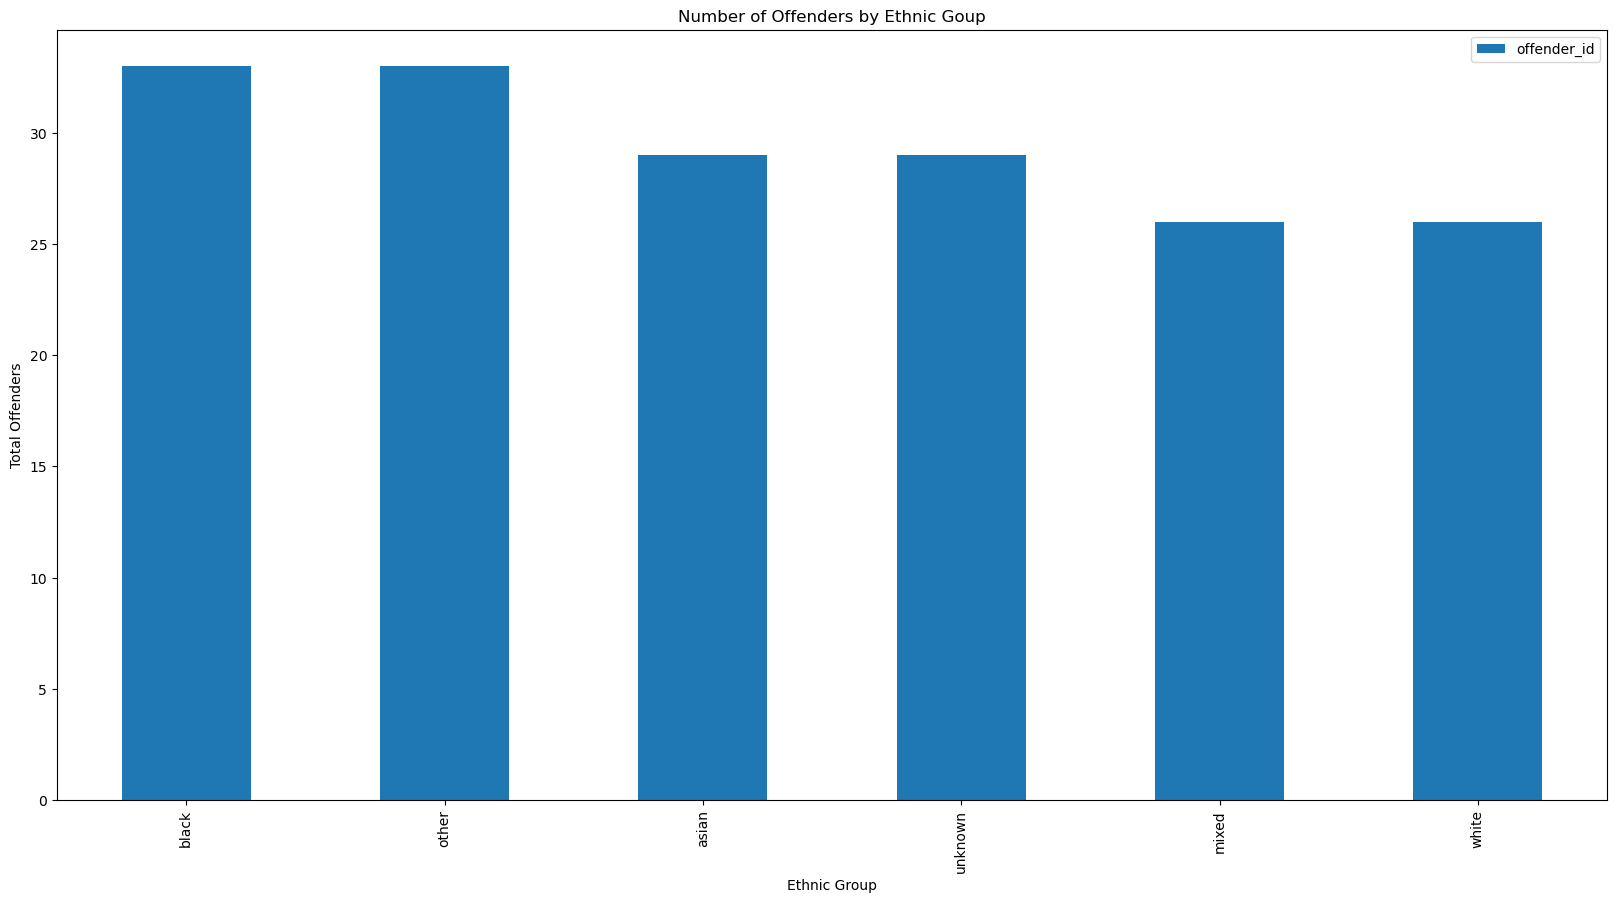

In [124]:
df5.plot(kind='bar', stacked = True, figsize=(20,10), title = "Number of Offenders by Ethnic Goup", ylabel = 'Total Offenders', xlabel = 'Ethnic Group')

In [125]:
df4['month'] = df4['breach_date'].astype(str).str.extract(r'-(\d{2})-')


/var/folders/tb/ysz4rfq13h78lv6c5yldlh9h0000gn/T/ipykernel_69965/1512926808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['month'] = df4['breach_date'].astype(str).str.extract(r'-(\d{2})-')


In [126]:
df4

,offender_id,offender_name,breach_date,tag_install_date,tag_type,dob,sex,ethnic_group,original_offence,month
0,YEG6518QIV,Ricky Booth,2023-03-11,2022-11-19,alcohol,1994-06-19,male,asian,Summary non-motoring,03
1,JME7219QND,Dr Charlene Jordan,2023-03-05,2022-09-02,location,1986-09-19,female,white,Violence against the person,03
2,WSO1347WIQ,Joseph Green,2023-03-23,2022-10-10,curfew,1988-10-05,male,other,Drug offence,03
3,TUP1206QEM,Mr Danny Robinson,2023-02-13,2022-12-14,location,1953-12-28,male,other,Theft offence,02
4,AVL7422VBW,Miss Mary Taylor,2023-02-01,2022-08-11,alcohol,1982-04-20,female,mixed,Theft offence,02
...,...,...,...,...,...,...,...,...,...,...
171,WVR0246ZRX,Geraldine Saunders,2023-02-17,2022-09-29,location,1979-04-03,female,white,Violence against the person,02
172,VFZ3076LYI,Amanda Carroll,2023-04-06,2022-08-16,alcohol,1953-02-18,female,white,Violence against the person,04
173,ATD5548TQU,Mr Nicholas Thomas,2023-02-13,2022-10-16,curfew,1988-09-07,male,unknown,Criminal Damage,02
174,JAZ3465UYP,Mr Bernard Lee,2023-03-09,2022-12-03,alcohol,2017-01-25,male,unknown,Criminal Damage,03


In [127]:
df6 = df4.groupby('month')[['offender_id']].count().sort_values(by="month", ascending=True)

In [128]:
df6

,offender_id
month,
01,35
02,35
03,32
04,39
05,35


<Axes: xlabel='month'>

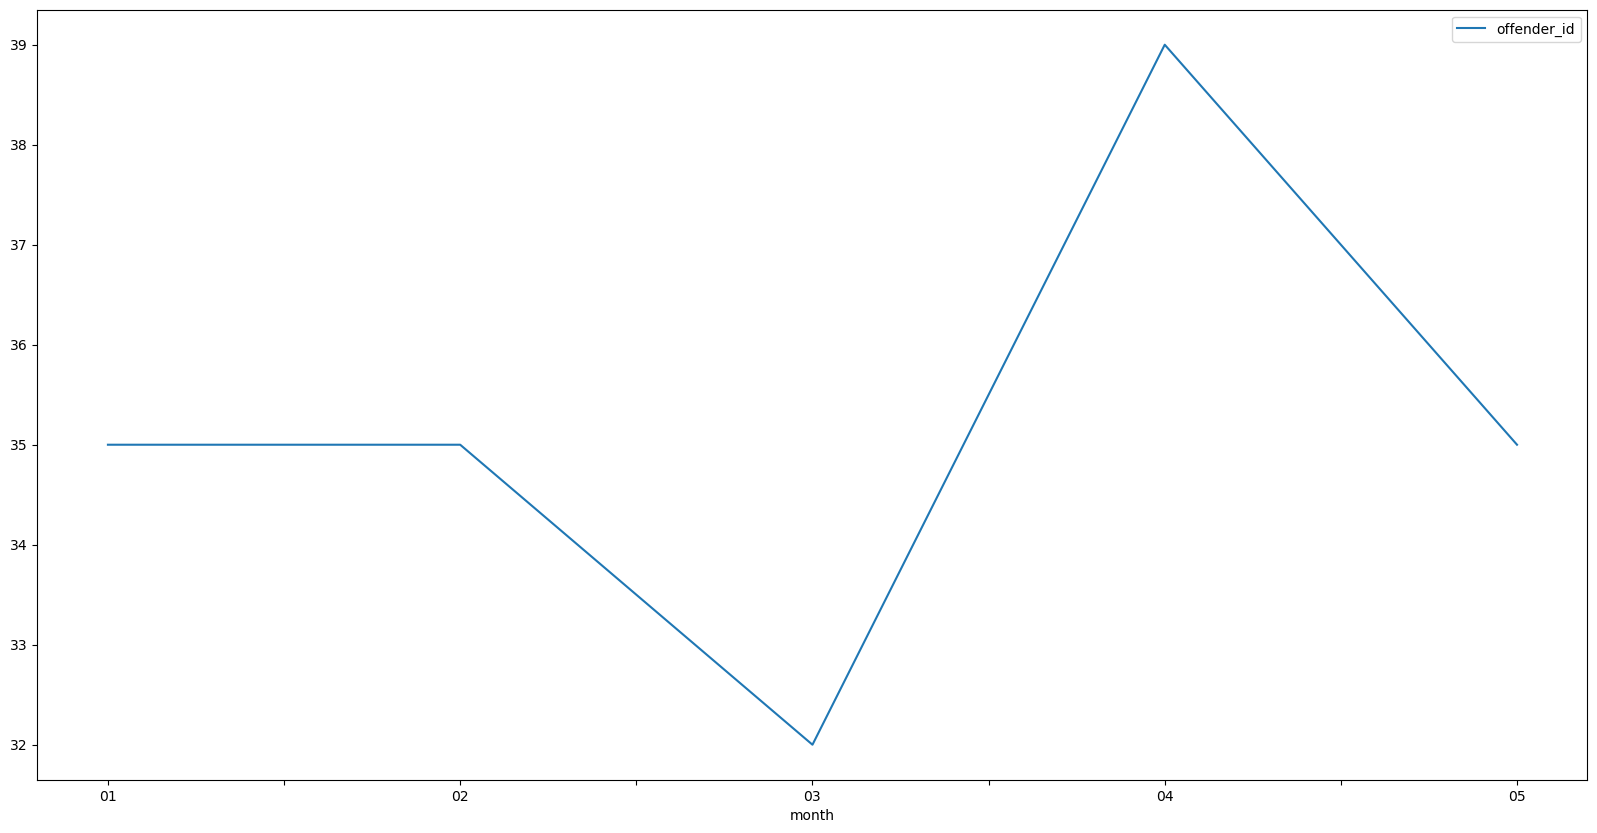

In [129]:
df6.plot(figsize=(20,10))

In [130]:
df7 = df4.groupby('tag_type')[['offender_id']].count().sort_values(by="offender_id", ascending=False)

In [131]:
df7

,offender_id
tag_type,
curfew,66
location,58
alcohol,52


<Axes: xlabel='tag_type'>

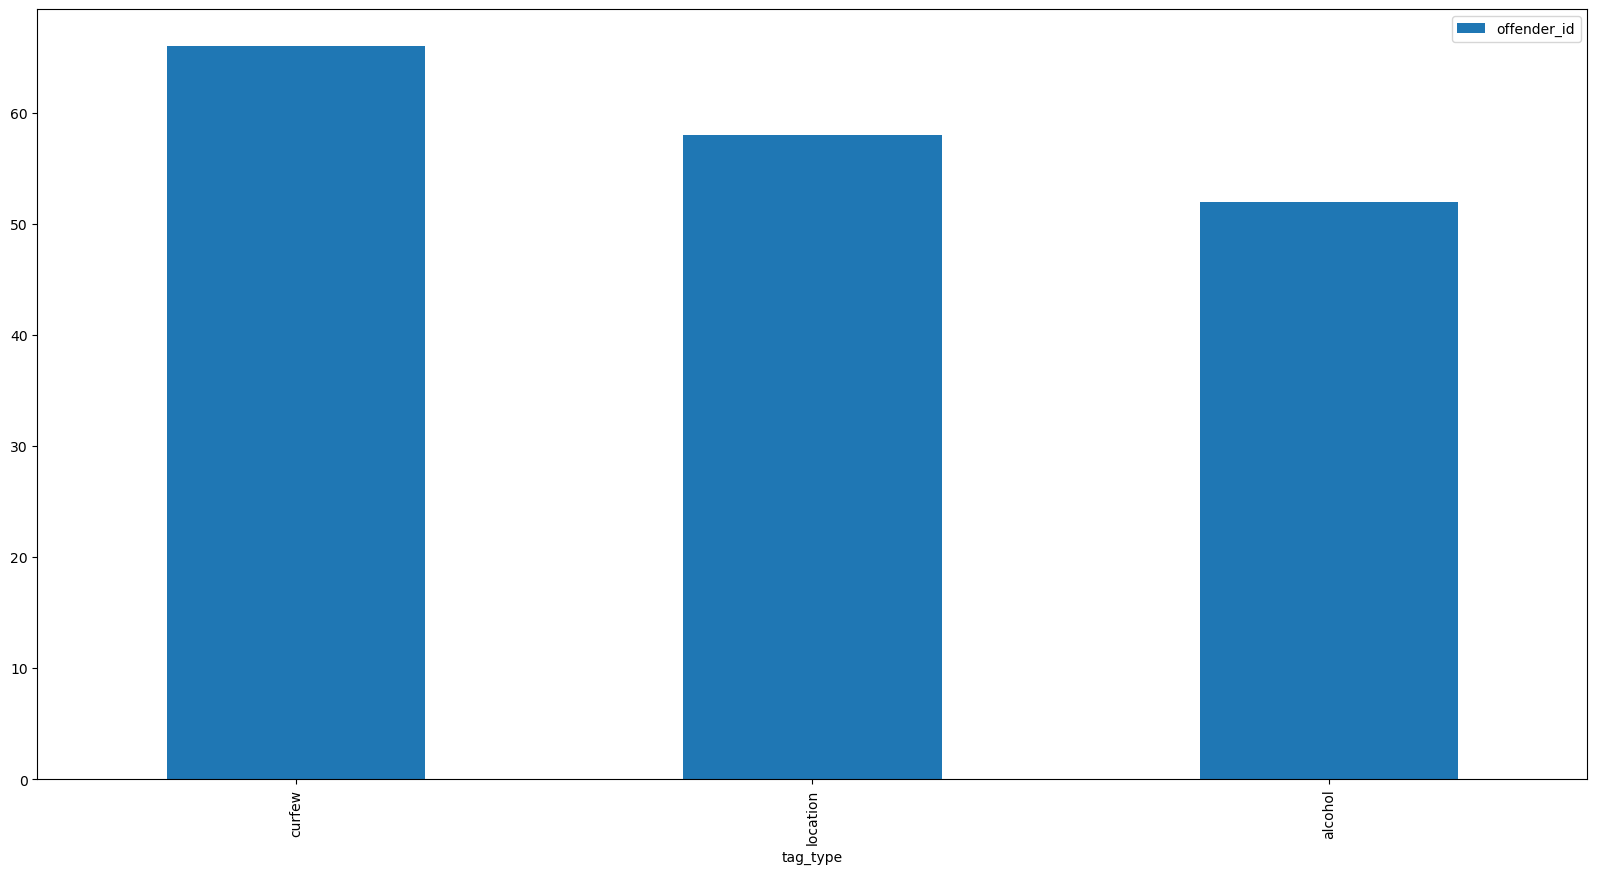

In [132]:
df7.plot(kind='bar', figsize=(20,10))

In [133]:
df4['dob'] = pd.to_datetime(df4['dob'])

/var/folders/tb/ysz4rfq13h78lv6c5yldlh9h0000gn/T/ipykernel_69965/2787534308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['dob'] = pd.to_datetime(df4['dob'])


In [134]:
current_date = datetime.now()
df4['age'] = (current_date - df4['dob']).astype('<m8[Y]')

/var/folders/tb/ysz4rfq13h78lv6c5yldlh9h0000gn/T/ipykernel_69965/387396474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['age'] = (current_date - df4['dob']).astype('<m8[Y]')


In [135]:
df4

,offender_id,offender_name,breach_date,tag_install_date,tag_type,dob,sex,ethnic_group,original_offence,month,age
0,YEG6518QIV,Ricky Booth,2023-03-11,2022-11-19,alcohol,1994-06-19,male,asian,Summary non-motoring,03,29.0
1,JME7219QND,Dr Charlene Jordan,2023-03-05,2022-09-02,location,1986-09-19,female,white,Violence against the person,03,37.0
2,WSO1347WIQ,Joseph Green,2023-03-23,2022-10-10,curfew,1988-10-05,male,other,Drug offence,03,35.0
3,TUP1206QEM,Mr Danny Robinson,2023-02-13,2022-12-14,location,1953-12-28,male,other,Theft offence,02,69.0
4,AVL7422VBW,Miss Mary Taylor,2023-02-01,2022-08-11,alcohol,1982-04-20,female,mixed,Theft offence,02,41.0
...,...,...,...,...,...,...,...,...,...,...,...
171,WVR0246ZRX,Geraldine Saunders,2023-02-17,2022-09-29,location,1979-04-03,female,white,Violence against the person,02,44.0
172,VFZ3076LYI,Amanda Carroll,2023-04-06,2022-08-16,alcohol,1953-02-18,female,white,Violence against the person,04,70.0
173,ATD5548TQU,Mr Nicholas Thomas,2023-02-13,2022-10-16,curfew,1988-09-07,male,unknown,Criminal Damage,02,35.0
174,JAZ3465UYP,Mr Bernard Lee,2023-03-09,2022-12-03,alcohol,2017-01-25,male,unknown,Criminal Damage,03,6.0


In [146]:
# Count the number of individuals in different age groups (e.g., 0-18, 19-35, 36-50, 51+)
age_bins = [0, 18, 35, 50, df4['age'].max()]
age_labels = ['0-18', '19-35', '36-50', '51+']
df4['age_group'] = pd.cut(df4['age'], bins=age_bins, labels=age_labels)
age_group_counts = df4['age_group'].value_counts()
print("Age Group Counts:\n", age_group_counts)

Age Group Counts:
 51+      96
19-35    31
0-18     28
36-50    21
Name: age_group, dtype: int64


/var/folders/tb/ysz4rfq13h78lv6c5yldlh9h0000gn/T/ipykernel_69965/3701927938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['age_group'] = pd.cut(df4['age'], bins=age_bins, labels=age_labels)


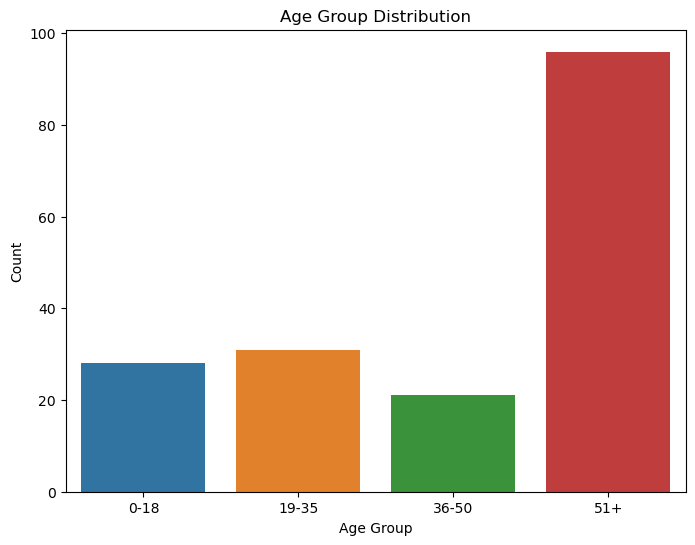

In [147]:
# Visualize age groups with a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

In [137]:
df9 = df4.groupby('sex')[['offender_id']].count().sort_values(by="offender_id", ascending=True)

In [138]:
df9

,offender_id
sex,
unknown,1
female,81
male,94


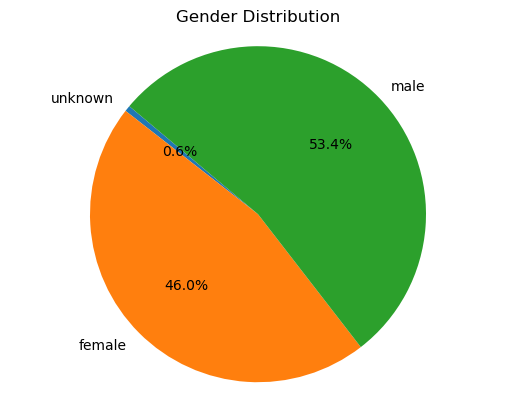

In [141]:
plt.pie(df9.offender_id, labels=df9.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')

plt.show()